Correlation Heatmap

In [33]:
import pandas as pd
cleaned_data = pd.read_csv("Airbnb_Open_Data_cleaned.csv")

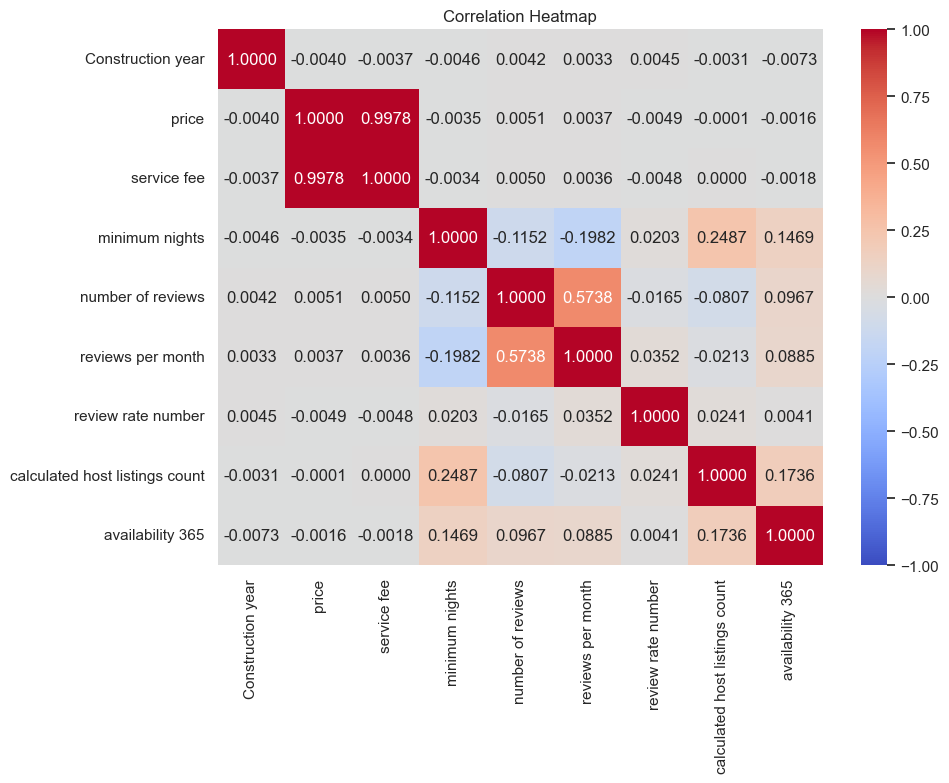

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

try:
    import seaborn as sns
    sns.set_theme(style="white")
except ImportError:
    sns = None

numeric_cols = [
    "Construction year",
    "price",
    "service fee",
    "minimum nights",
    "number of reviews",
    "reviews per month",
    "review rate number",
    "calculated host listings count",
    "availability 365",
]

existing_numeric = [c for c in numeric_cols if c in cleaned_data.columns]
if not existing_numeric:
    print("No numeric columns found for correlation heatmap.")
else:
    corr_matrix = cleaned_data[existing_numeric].apply(pd.to_numeric, errors="coerce").corr()

    plt.figure(figsize=(10, 8))
    if sns is not None:
        sns.heatmap(corr_matrix, annot=True, fmt=".4f", cmap="coolwarm", vmin=-1, vmax=1)
    else:
        plt.imshow(corr_matrix, cmap="coolwarm", vmin=-1, vmax=1)
        plt.colorbar()
        plt.xticks(range(len(existing_numeric)), existing_numeric, rotation=45, ha="right")
        plt.yticks(range(len(existing_numeric)), existing_numeric)
    plt.title("Correlation Heatmap")
    plt.tight_layout()
    plt.show()


FP-Growth

In [35]:
import sys
!{sys.executable} -m pip install pyfpgrowth

In [36]:
import pandas as pd
import pyfpgrowth

if "cleaned_data" not in globals():
    cleaned_data = pd.read_csv("Airbnb_Open_Data_cleaned.csv")

categorical_cols = [
    "host_identity_verified",
    "neighbourhood group",
    "instant_bookable",
    "cancellation_policy",
    "room type",
]

existing_cat = [c for c in categorical_cols if c in cleaned_data.columns]
transactions = []
for _, row in cleaned_data[existing_cat].astype("string").iterrows():
    items = [f"{col}={row[col]}" for col in existing_cat if pd.notna(row[col])]
    transactions.append(items)

# min_support is absolute count here
min_support = int(0.05 * len(transactions))
patterns = pyfpgrowth.find_frequent_patterns(transactions, min_support)
rules = pyfpgrowth.generate_association_rules(patterns, 0.6)  # min confidence

# Keep only 1->1 pairs
pairs = []
for antecedent, (consequent, confidence) in rules.items():
    if len(antecedent) == 1 and len(consequent) == 1:
        pairs.append((antecedent[0], consequent[0], confidence))

pairs = sorted(pairs, key=lambda x: x[2], reverse=True)[:20]
pairs

[]